# Electricity Consumption Model: Work in Progress

## Defining Functions

In [17]:
# Importing libraries 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime
import warnings
import os
import scipy
import seaborn as sns

# Squash warning messages for cleaner output in the notebook
warnings.showwarning = lambda *args, **kwargs: None

In [2]:
# Function which takes a dataframe where
# each column represents a load and rows = date/time
# returns same dataframe but with a aggregated column.

def add_aggregated_col(dataframe):
    dataframe.sort_index(inplace=True) # making sure df is sorted
    dataframe['AggregatedLoad'] = dataframe.sum(numeric_only=True, axis=1) # add new sum col
    return dataframe

In [3]:
# Takes a dataframe and returns a sorted list
# of the 'AggregtedLoad' column, which should be defined. 

def from_df_to_sorted_lst(dataframe):
    sorted_load_list = dataframe['AggregatedLoad'].sort_values().tolist()
    return sorted_load_list

In [4]:
# Function that takes a sorted list of load demand 
# values and produces a plot of the load duration curve.

def plot_load_duration_curve(sorted_demand_list):
    list_len = len(sorted_demand_list) #Number of datapoints
    x = np.linspace(1,list_len,list_len).tolist() #List of hours
    
    plt.plot(x,sorted_demand_list)
    plt.title('Load Duration curve')
    plt.xlabel('Hours')
    plt.ylabel('Consumption [kWh]') #Review if kwh or not later on

In [46]:
# Function which takes dataframe and calculates mean and standard deviation. 
# Plotting and printing is by default False. 

def calculate_norm_stats(dataframe, plot = False, prnt = False):
    start_date, end_date = dataframe.index[0].to_pydatetime().date(), dataframe.index[-1].to_pydatetime().date()
    agg_load_list = dataframe['AggregatedLoad'].tolist()
    mu, sigma = scipy.stats.norm.fit(agg_load_list)
    
    if plot: 
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))
        plt.title('Gaussian distribution of hourly aggregated loads')
        plt.show()
        
    if prnt:
        print('Mean consumption from {} to {} is {} (-/+ {}).'.format(start_date,end_date,mu,sigma)) #add unit here
    
    return mu, sigma

## Testing 

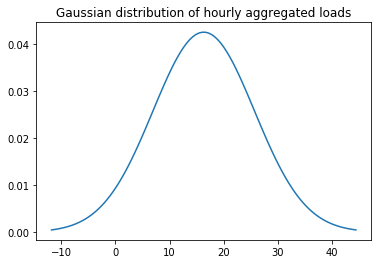

Mean consumption from 2018-04-24 to 2019-04-24 is 16.32116290983607 (-/+ 9.37528340154718).


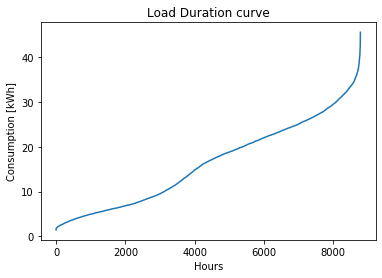

In [47]:
# Using the data from Claes. 
claes_data = pd.read_csv('claes_test.csv', index_col=0, parse_dates=True)
claes_data.head()

# Drop things which is not necessary for testing yet
claes_data.drop(columns=['Temperature','aggLoad'], inplace=True)
claes_data.head()

# Running the functions defined above
df = add_aggregated_col(claes_data)
lst = from_df_to_sorted_lst(df)

calculate_norm_stats(df, plot = True, prnt = True)

plot_load_duration_curve(lst)

In [43]:
claes_data.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,AggregatedLoad
TimeDate,,,,,,,,,,
2018-04-24 00:00:00,2.7,0.0,2.72,2.6,1.4,1.2,1.1,1.3,1.6,14.62
2018-04-24 01:00:00,2.6,0.0,2.39,3.2,1.0,1.2,1.1,1.2,1.4,14.09
2018-04-24 02:00:00,2.8,0.0,1.79,3.0,1.3,1.1,1.1,1.4,1.3,13.79
2018-04-24 03:00:00,2.6,0.0,1.78,3.0,1.3,1.2,1.1,1.9,1.1,13.98
2018-04-24 04:00:00,2.6,0.0,2.07,3.3,0.8,1.2,1.1,1.2,1.1,13.37
